In [1]:
#pip install flask

In [2]:
#pip install gevent

In [3]:
%matplotlib inline
import os
from flask import Flask, render_template, request, redirect, Response, url_for
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import seaborn as sns
import io
import base64
import PIL

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from joblib import dump, load
from flask.json import jsonify


In [4]:
from gevent.pywsgi import WSGIServer

In [5]:
#checking the version of all the packages
print(f'Numpy version:{np.__version__}')

Numpy version:1.21.5


# Load the model

In [6]:
df_company_sorted=pd.read_csv('data/df_company_salary.csv')
df_title_sorted=pd.read_csv('data/df_title_salary.csv')
df_state_sorted=pd.read_csv('data/df_state_salary.csv')
df_category_sorted=pd.read_csv('data/df_category_sorted.csv')
app = Flask(__name__, static_url_path="/static")

app.config['SECRET_KEY'] = os.environ.get('SECRET_KEY', 'this_should_be_configured')

#Load the vectorizer and model here

labels=['Below 24400','24400-37500','37500-200000']
model_final = pickle.load(open('model_final.pkl','rb')) 
cvdf_vectorizer = pickle.load(open('fitted_cvdf.pkl','rb')) 

###
# Routing for your application.
###

@app.route('/')
def home():
    """Render website's home page."""
    return render_template('home.html', salaryRange="", salary_prediction_text="", show_word_cloud=False)


@app.route('/predict', methods=['POST'])
def salary_predictor():
    description = request.form.get('description')
    if description:
        result = labels[model_final.predict(cvdf_vectorizer.transform([description]))[0]]
    else:
        result='please enter valid text'
    return render_template('home.html', salaryRange = result, show_word_cloud=True, salary_prediction_text="The salary range of this job:")

@app.route('/plot.png')
def plot_png():
    fig = create_figure()
    output = io.BytesIO()
    FigureCanvas(fig).print_png(output)
    return Response(output.getvalue(), mimetype='image/png')

def create_figure():
    #fig = Figure(figsize=(18,18))
    #axis = fig.add_subplot(2, 1, 1)
    #axis.bar(height=df_title_sorted['SalaryNormalized'],x=df_title_sorted['short_title'],color='turquoise')
    #axis.set(title='job title vs salary in the UK', ylabel='Salary', xlabel='Job title')
    #axis.set_xticklabels(df_title_sorted['short_title'], rotation=90)
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    #plt.show()
    #plt.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    #plt.show()
    #axis.plot(xs, ys)
    #axis.bar(height=df_title_sorted['SalaryNormalized'],x=df_title_sorted['short_title'],color='turquoise')
    #axis.set(title='job title vs salary in the UK', ylabel='Salary', xlabel='Job title')
    #axis.set_xticklabels(df_title_sorted['short_title'], rotation=90)
    
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    import numpy as np
    # Generate data to plot
    linear = [x for x in range(5)]
    square = [x**2 for x in range(5)]
    cube = [x**3 for x in range(5)]
    # Generate Figure object and Axes object with shape 3x1
    
    fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(16,30))
    # Access first Subplot and plot linear numbers
    axes[0].bar(height=df_title_sorted['SalaryNormalized'],x=df_title_sorted['short_title'])
    axes[0].set_title('Normalized Salary vs Simplified Job Title',fontsize=30)
    axes[0].set_xlabel('Short title',fontsize=20)
    axes[0].set_ylabel('Salary',fontsize=20)
    axes[0].set_xticklabels (labels=df_title_sorted['short_title'][:15],rotation=90,fontsize=14) 
    # Access second Subplot and plot square numbers
    axes[1].bar(height=df_company_sorted['SalaryNormalized'][:15],x=df_company_sorted['Company'][:15])
    axes[1].set_title('Normalized Salary vs Company',fontsize=30)
    axes[1].set_xlabel('Company',fontsize=20)
    axes[1].set_ylabel('Salary',fontsize=20)
    axes[1].set_xticklabels (labels=df_company_sorted['Company'][:15],rotation=90,fontsize=14) 
    # Access third Subplot and plot cube numbers
    axes[2].bar(height=df_category_sorted['SalaryNormalized'][:15],x=df_category_sorted['Category'][:15])
    axes[2].set_title('Job Category vs Category',fontsize=30)
    axes[2].set_xlabel('Category',fontsize=20)
    axes[2].set_ylabel('Salary',fontsize=20)
    axes[2].set_xticklabels (labels=df_category_sorted['Category'][:15],rotation=90,fontsize=14) 
    plt.tight_layout()
    plt.show()
    return fig


::1 - - [2022-04-07 10:09:18] "GET / HTTP/1.1" 200 891 0.007995
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels (labels=df_title_sorted['short_title'][:15],rotation=90,fontsize=14)
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels (labels=df_company_sorted['Company'][:15],rotation=90,fontsize=14)
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels (labels=df_category_sorted['Category'][:15],rotation=90,fontsize=14)


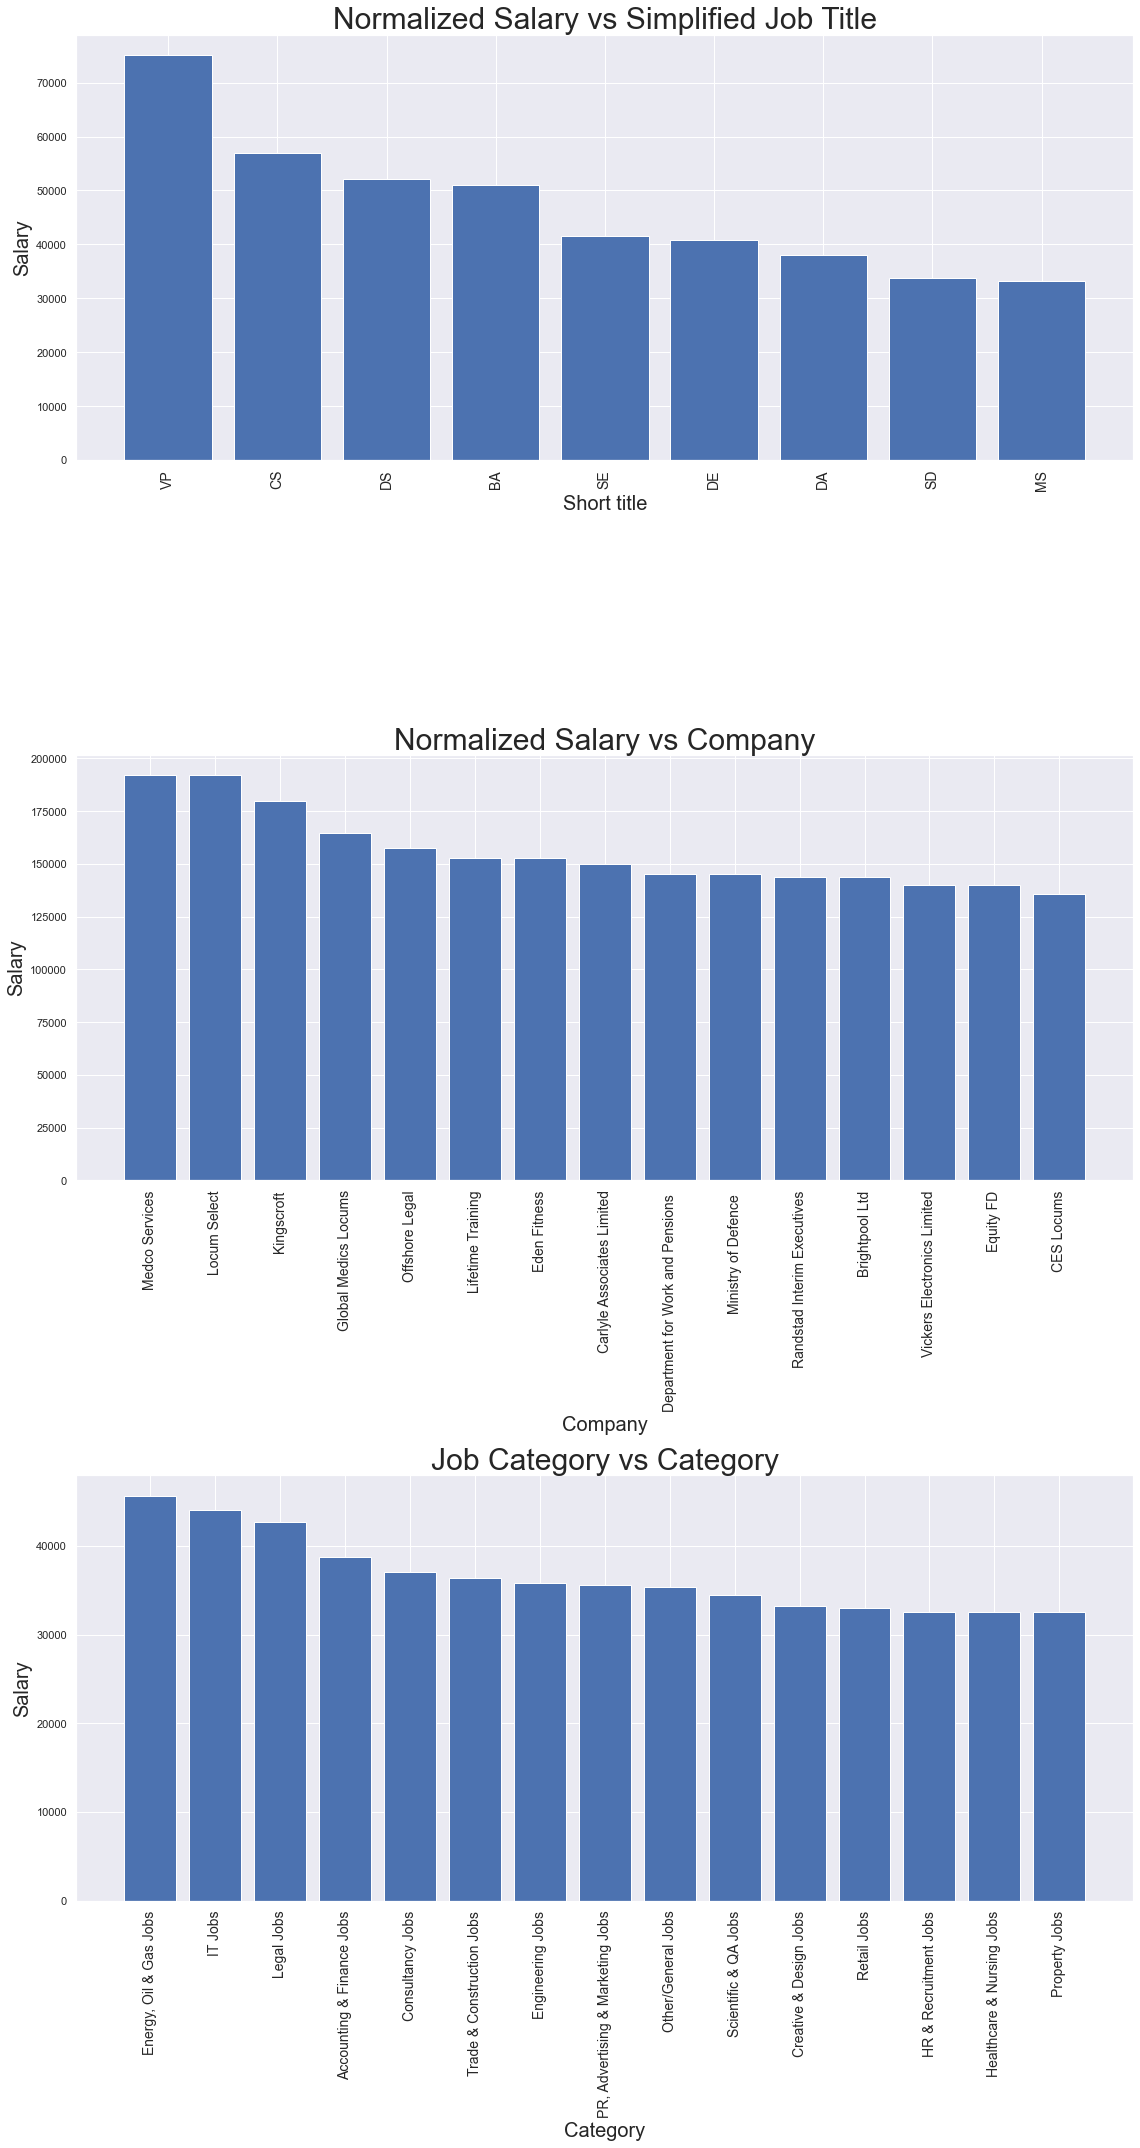

::1 - - [2022-04-07 10:09:19] "GET /plot.png HTTP/1.1" 200 153794 1.099997
::1 - - [2022-04-07 10:09:21] "POST /predict HTTP/1.1" 200 931 0.016003
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels (labels=df_title_sorted['short_title'][:15],rotation=90,fontsize=14)
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels (labels=df_company_sorted['Company'][:15],rotation=90,fontsize=14)
C:\Users\moonm\AppData\Local\Temp\ipykernel_11476\4268753680.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels (labels=df_category_sorted['Category'][:15],rotation=90,fontsize=14)


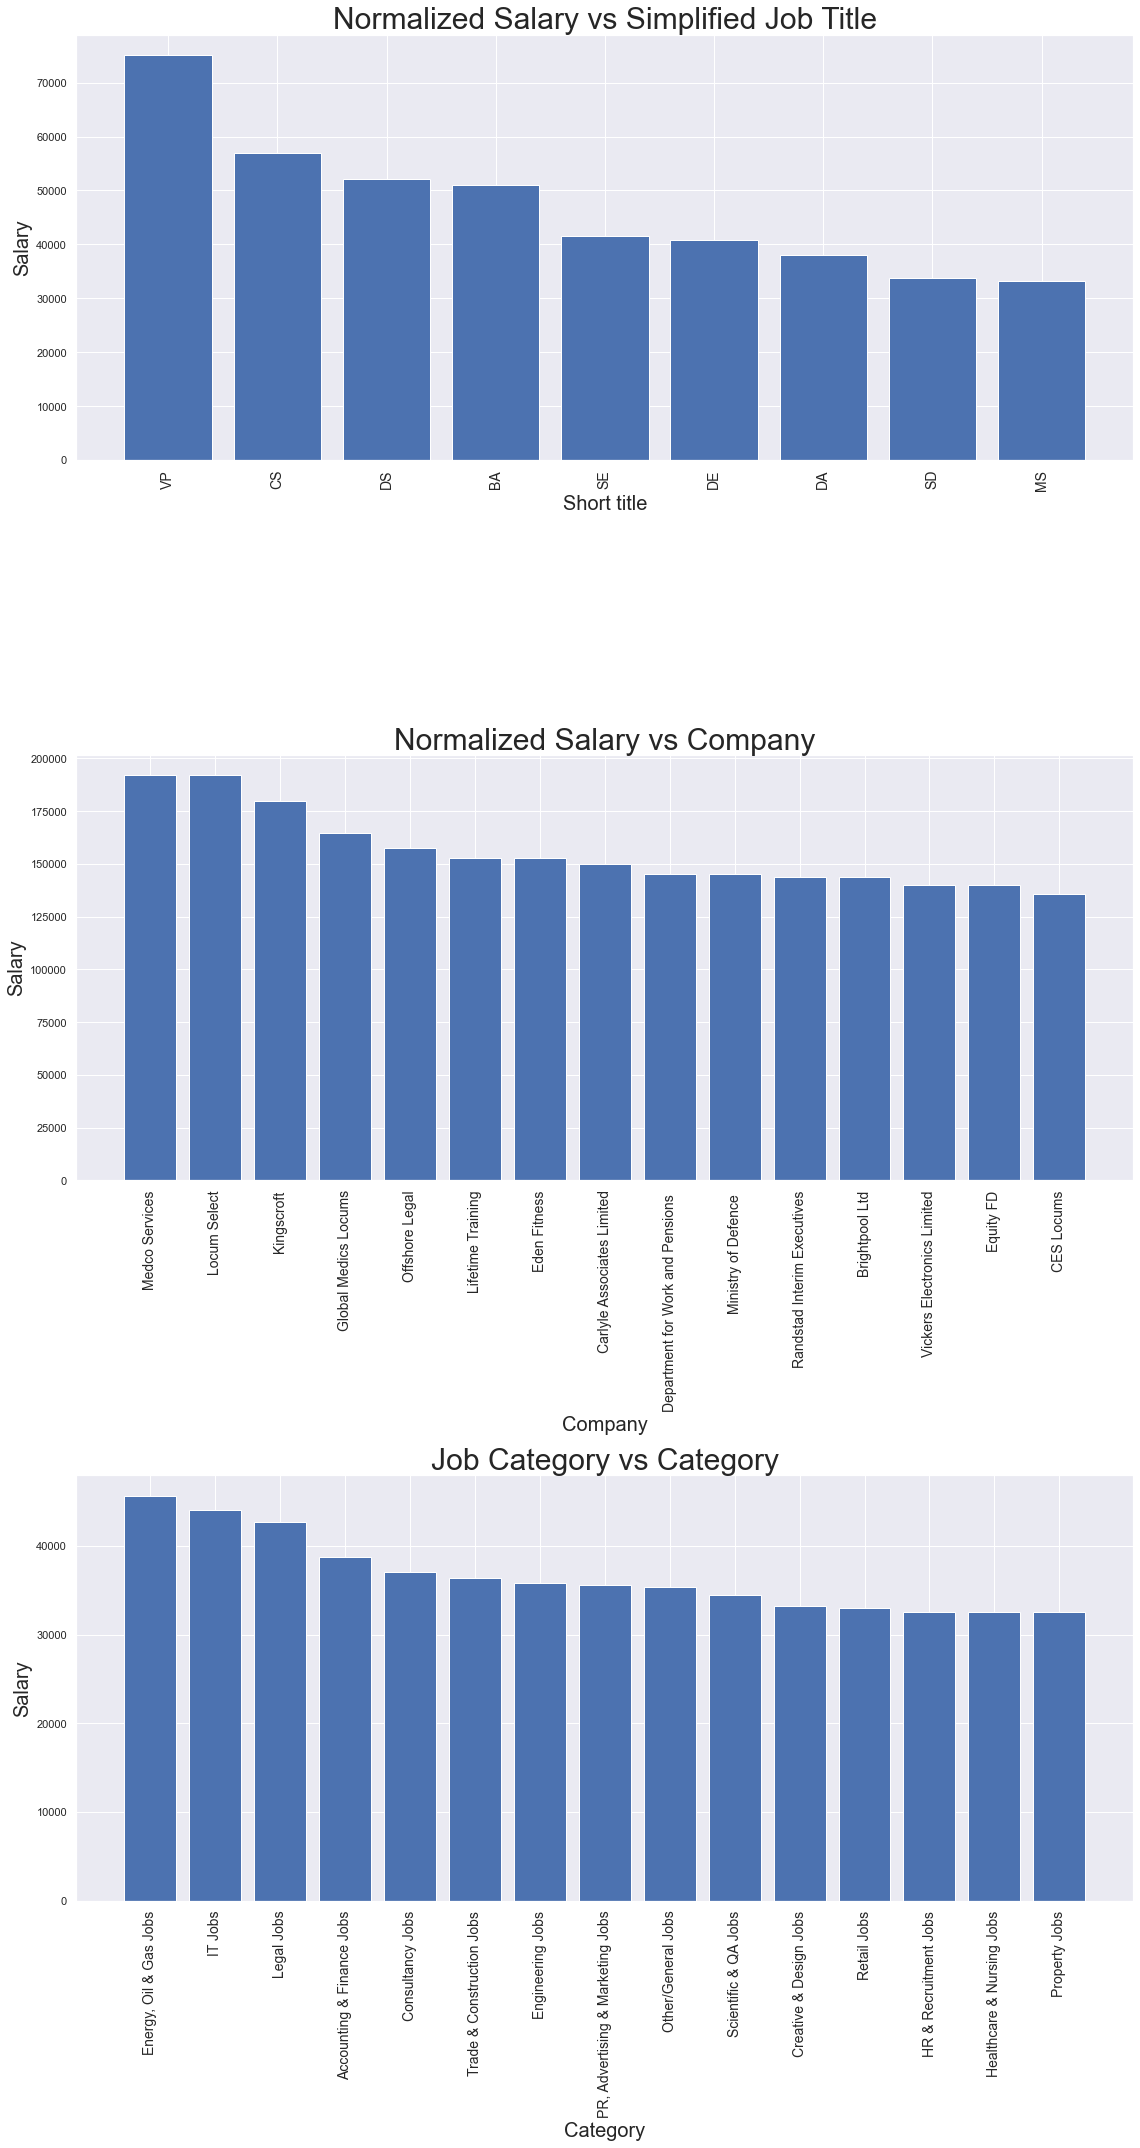

::1 - - [2022-04-07 10:09:22] "GET /plot.png HTTP/1.1" 200 153794 1.020007
Traceback (most recent call last):
  File "C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\gevent\_ffi\loop.py", line 270, in python_check_callback
    def python_check_callback(self, watcher_ptr): # pylint:disable=unused-argument
KeyboardInterrupt
2022-04-07T02:09:47Z


KeyboardInterrupt: 

In [7]:
if __name__=='__main__':
    http_server = WSGIServer(('', 5000), app)
    http_server.serve_forever()

In [ ]:
#can access the website through the link (http://localhost:5000) for testing.